# Conversion Rate

We have data about users who hit our site: whether they converted or not as well as some of their characteristics such as their country, the marketing channel, their age, whether they are repeat users and the number of pages visited during that session (as a proxy for site activity/time spent on site).

Your project is to:
- Predict conversion rate
- Come up with recommendations for the product team and the marketing team to improve conversion rate

## Conversion Rate definition
The conversion rate is the proportion of visitors to a website who take action to go beyond a casual content view or website visit, as a result of subtle or direct requests from marketers, advertisers, and content creators.

In different market, the conversion rate has unique definition. For most online commercial website, the conversion rate is defined as the ratio of people who finally make a purchase online over the total number of visitors.


## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
conversion_rate = pd.read_csv('conversion_data.csv')
conversion_rate.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
conversion_rate['total_pages_visited'] > 30

In [4]:
min(1, 3)

1

## Categorical data exploratory analysis

In [3]:
print('The number of visitor group by', conversion_rate.groupby('country')['converted'].count())
print('The number of visitor group by', conversion_rate.groupby('source')['source'].count())
print('The number of visitor group by', conversion_rate.groupby('new_user')['new_user'].count())
print('The number of visitor group by', conversion_rate.groupby('converted')['converted'].count())
# This is an imbalanced data classification problem

The number of visitor group by country
China       76602
Germany     13056
UK          48450
US         178092
Name: converted, dtype: int64
The number of visitor group by source
Ads        88740
Direct     72420
Seo       155040
Name: source, dtype: int64
The number of visitor group by new_user
0     99456
1    216744
Name: new_user, dtype: int64
The number of visitor group by converted
0    306000
1     10200
Name: converted, dtype: int64


## Numerical data exploratory analysis

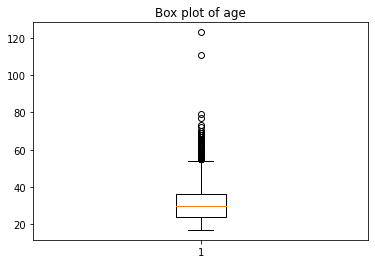

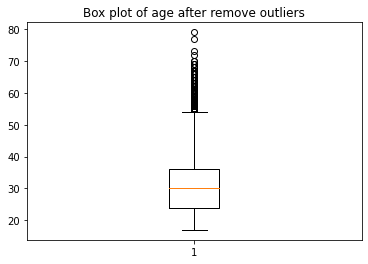

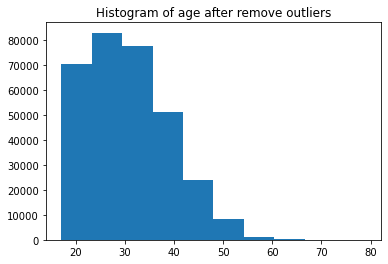

In [4]:
### age ###
plt.boxplot(conversion_rate['age'])
plt.title('Box plot of age')
plt.show()
# drop outliers
conv_rate_age_corrected = conversion_rate[conversion_rate['age'] <= 100]
plt.boxplot(conv_rate_age_corrected['age'])
plt.title('Box plot of age after remove outliers')
plt.show()
# histogram
plt.hist(conv_rate_age_corrected['age'])
plt.title('Histogram of age after remove outliers')
plt.show()

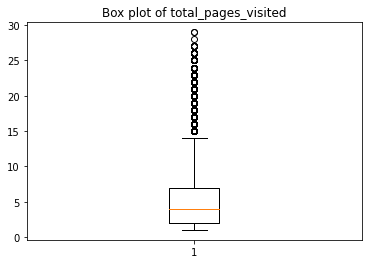

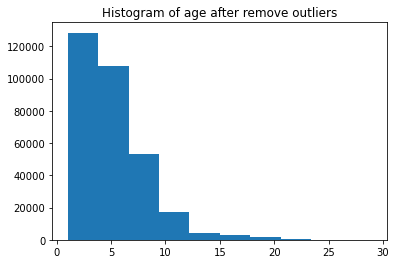

In [5]:
### total_pages_visited ###
plt.boxplot(conv_rate_age_corrected['total_pages_visited'])
plt.title('Box plot of total_pages_visited')
plt.show()
plt.hist(conv_rate_age_corrected['total_pages_visited'])
plt.title('Histogram of age after remove outliers')
plt.show()
# no clear outliers
conv_rate = conv_rate_age_corrected.copy()

## One-hot transformation

In [75]:
conv_rate_onehot = pd.get_dummies(conv_rate, columns = ['country', 'new_user', 'source'])
conv_rate_onehot.head()

,age,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo
0,25,1,0,0,0,1,0,0,1,1,0,0
1,23,5,0,0,0,0,1,0,1,0,0,1
2,28,4,0,0,0,0,1,0,1,0,0,1
3,39,5,0,1,0,0,0,0,1,0,0,1
4,30,6,0,0,0,0,1,0,1,0,0,1


## Create training and test dataset

In [79]:
from sklearn.model_selection import train_test_split
X = conv_rate_onehot.drop('converted', axis='columns')
y = conv_rate_onehot.converted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 19)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.01, random_state = 19)

# Logistic regression

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [157]:
# change class weight
logistic_base_model = LogisticRegression(class_weight = {0:1, 1:30}, max_iter = 300)
logistic_base_model.fit(X_train, y_train)
y_pred = logistic_base_model.predict(X_dev)
print('The accuracy of the base logistic regression model is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (logistic_base_model.score(X_dev, y_dev), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))

The accuracy of the base logistic regression model is 0.94, the recall is 0.93, and the F-1 score is 0.52


In [184]:
# over-sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 19)
X_train_oversampled, y_train_oversampled = oversample.fit_resample(X_train, y_train)
logistic_oversampled_model = LogisticRegression(max_iter = 1000)
logistic_oversampled_model.fit(X_train_oversampled, y_train_oversampled)
y_pred_oversampled = logistic_oversampled_model.predict(X_dev)
print('The accuracy of the oversampled logistic regression model with over-sampled data is %.2f, the recall is %.2f, and the F-1 score is %.2f' \
      % (logistic_oversampled_model.score(X_dev, y_dev), recall_score(y_dev, y_pred_oversampled), f1_score(y_dev, y_pred_oversampled)))


# synthetic sample
from imblearn.over_sampling import SMOTE
synthetic = SMOTE(random_state = 19)
X_train_synthetic, y_train_synthetic = synthetic.fit_resample(X_train, y_train)
logistic_synthetic_model = LogisticRegression(max_iter = 1000)
logistic_synthetic_model.fit(X_train_synthetic, y_train_synthetic)
y_pred_synthetic = logistic_synthetic_model.predict(X_dev)
print('The accuracy of the synthetic oversampled logistic regression model with over-sampled data is %.2f, the recall is %.2f, and the F-1 score is %.2f' \
      % (logistic_oversampled_model.score(X_dev, y_dev), recall_score(y_dev, y_pred_synthetic), f1_score(y_dev, y_pred_synthetic )))

# under_sampling 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=19)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)
logistic_undersampled_model = LogisticRegression(max_iter = 1000)
logistic_undersampled_model.fit(X_train_undersampled, y_train_undersampled)
y_pred_undersampled = logistic_undersampled_model.predict(X_dev)
print('The accuracy of the undersampled logistic regression model with over-sampled data is %.2f, the recall is %.2f, and the F-1 score is %.2f' \
      % (logistic_undersampled_model.score(X_dev, y_dev), recall_score(y_dev, y_pred_undersampled), f1_score(y_dev, y_pred_undersampled)))


The accuracy of the oversampled logistic regression model with over-sampled data is 0.95, the recall is 0.92, and the F-1 score is 0.56
The accuracy of the synthetic oversampled logistic regression model with over-sampled data is 0.95, the recall is 0.92, and the F-1 score is 0.56
The accuracy of the undersampled logistic regression model with over-sampled data is 0.94, the recall is 0.93, and the F-1 score is 0.53


## Decision tree

In [159]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_base_model = DecisionTreeClassifier()
decision_tree_base_model.fit(X_train, y_train)
y_pred = decision_tree_base_model.predict(X_dev)
print('The accuracy of the base decision tree model is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (decision_tree_base_model.score(X_dev, y_dev), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))

The accuracy of the base decision tree model is 0.99, the recall is 0.73, and the F-1 score is 0.78


In [208]:
decision_tree_tune_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 8)
decision_tree_tune_model.fit(X_train, y_train)
y_pred = decision_tree_tune_model.predict(X_dev)
print('The accuracy of the base decision tree model is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (decision_tree_tune_model.score(X_dev, y_dev), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))

The accuracy of the base decision tree model is 0.99, the recall is 0.75, and the F-1 score is 0.80


## Random forest

In [209]:
from sklearn.ensemble import RandomForestClassifier
random_forest_base_model = RandomForestClassifier()
random_forest_base_model.fit(X_train, y_train)
y_pred = random_forest_base_model.predict(X_dev)
print('The accuracy of the random forest model is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (random_forest_base_model.score(X_dev, y_dev), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))

The accuracy of the random forest model is 0.99, the recall is 0.75, and the F-1 score is 0.79


In [211]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [212]:
random_forest_base_model = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = random_forest_base_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=19, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
y_pred = rf_random.predict(X_dev)
print('The accuracy of the random forest model is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (rf_random.score(X_dev, y_dev), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.0min


KeyboardInterrupt: 

## SVM

In [164]:
from sklearn.svm import LinearSVC

In [226]:
svm_base_model = LinearSVC(class_weight = {0:1, 1:30})
svm_base_model.fit(X_train, y_train)
y_pred = svm_base_model.predict(X_dev)
print('The accuracy of the SVM model is %.2f, the precision is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (svm_base_model.score(X_dev, y_dev), precision_score(y_dev, y_pred), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))

The accuracy of the SVM model is 0.99, the precision is 0.92, the recall is 0.63, and the F-1 score is 0.75


/Users/suhanling/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [225]:
svm_base_model = LinearSVC(max_iter = 2000).fit(X_train_oversampled, y_train_oversampled)
y_pred = svm_base_model.predict(X_dev)
print('The accuracy of the SVM model is %.2f, the precision is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (svm_base_model.score(X_dev, y_dev), precision_score(y_dev, y_pred), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))

The accuracy of the SVM model is 0.93, the precision is 0.33, the recall is 0.94, and the F-1 score is 0.49


/Users/suhanling/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn_base_model = KNeighborsClassifier()
knn_base_model.fit(X_train, y_train)
y_pred = knn_base_model.predict(X_dev)
print('The accuracy of the SVM model is %.2f, the precision is %.2f, the recall is %.2f, and the F-1 score is %.2f'\
      % (knn_base_model.score(X_dev, y_dev), precision_score(y_dev, y_pred), recall_score(y_dev, y_pred), f1_score(y_dev, y_pred)))

The accuracy of the SVM model is 0.99, the precision is 0.85, the recall is 0.75, and the F-1 score is 0.80
